In [19]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import tensorflow as tf
from tensorflow import keras

In [20]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [21]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [22]:
X = housing.data
y = housing.target

Separación de los datos:

In [23]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Los datos de las X deben estar escaladas

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
y_train

array([0.959, 2.436, 3.022, ..., 1.083, 0.912, 2.374])

In [27]:
X_train.shape

(11610, 8)

### Creación de una red neuronal (modelo)
Función secuencial que le pasamos una lista de capas.

In [ ]:
#Api funcional
inputs = keras.Input((8,))
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
outputs = keras.layers.Dense(1)(hidden1)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])

In [28]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)), # Capa de entrada de 8 
    # Otra forma para ahorrar las 2 primeras líneas de la creación de la red neuronal:
    # keras.layers.Dense(30, activation='relu', input_shape=(8,)), Tiene una capa de entrada que tiene 8 neuronas
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)   # Capa de salida (un valor de salida)
])

Para decirle la **función de error** que va utilizar hay que compilar:

In [29]:
# Error Medio Cuadrático
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(learning_rate=0.001))

El **optimizador** es para gestionar los pesos de las neuronas

Para enseñar lo que tiene:

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10000,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_data=(X_val, y_val)
)

Epoch 1/10000
334/363 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 3.9265

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8060 - val_loss: 1.1007
Epoch 2/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9809 - val_loss: 0.7592
Epoch 3/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.7557 - val_loss: 0.6979
Epoch 4/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.7036 - val_loss: 0.6654
Epoch 5/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6717 - val_loss: 0.6402
Epoch 6/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.6463 - val_loss: 0.6187
Epoch 7/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.6244 - val_loss: 0.5999
Epoch 8/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.6054 - val_loss: 0.5834
Epoch 9/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5886 - val_loss: 0.5689
Epoch 10/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.5738 - val_loss: 0.5563
Epoch 11/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5605 - val_loss: 0.5454
Epoch 12/10000
363/

En caso de tener valores de validación se los ponemos:

In [32]:
# model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

[]

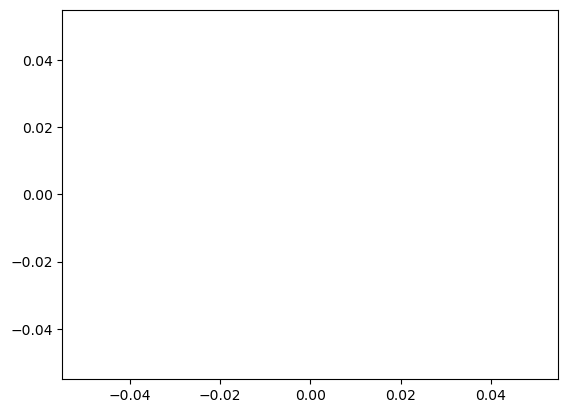

In [37]:
plt.plot(pd.DataFrame(model.history.history))

In [34]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.3255


0.3247540295124054

In [35]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.49350274],
       [1.3632029 ],
       [4.2157526 ]], dtype=float32)

## Guardado del modelo

In [36]:
# model.save("modelito.keras")
# model = keras.models.load_model("modelito.h5")